In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile   as sf

In [2]:
def generateSin(freq, time, fs):
    n = time*fs #numero de pontos
    x = np.linspace(0.0, time, n)  # eixo do tempo
    s = np.sin(freq*x*2*np.pi)
    return (x, s)

In [16]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

In [17]:
def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 120.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

In [18]:
fs  = 44100
T   = 4     
t   = np.linspace(-T/2,T/2,T*fs)

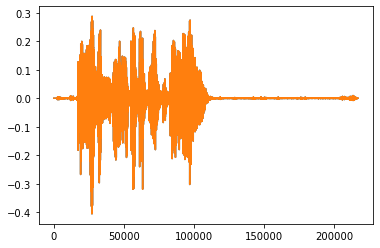

In [25]:
audio, samplerate = sf.read('sound.wav')
sd.play(audio,fs)
plt.figure() 
plt.plot(audio)


In [21]:
variavel = 1/np.min(audio)
audio_norm = audio*variavel
sd.play(audio_norm,fs)

___
### Audio normalizado: 

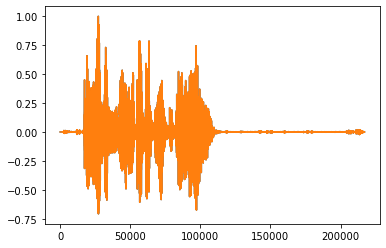

In [26]:
plt.figure() 
plt.plot(audio_norm)
sd.play(audio_norm,fs)

(0.0, 25000.0)

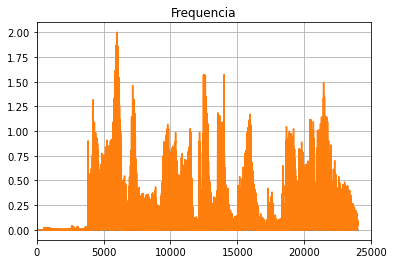

In [35]:
X, Y = calcFFT(audio_norm, samplerate)
plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Frequencia')
plt.xlim(0,25000)

___
### Filtrando

filtrado


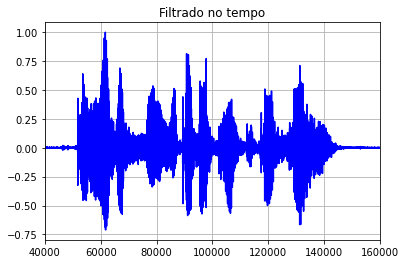

In [43]:
audioFiltrado = LPF(audio_norm[:,1], 4000, fs)
print("filtrado")
#sd.play(yFiltrado)
#sd.wait()
plt.plot(yFiltrado, 'b')
plt.grid()
plt.title('Filtrado no tempo')
plt.xlim(40000,160000)
sd.play(audioFiltrado,fs)

In [44]:
sd.play(audioFiltrado,fs)

In [45]:
x0, y0 = generateSin(14000,T,fs)

(0.0, 1000.0)

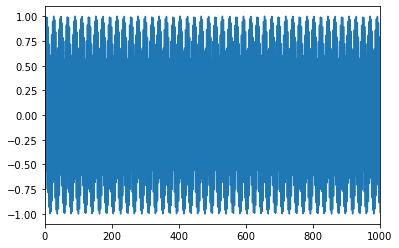

In [54]:
plt.figure() 
plt.plot(y0)
plt.xlim(0,1000)